### Foi escolhida a (ObesityDataSet_raw_and_data_sinthetic), vamos conhecer e descrever os dados
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [1]:
import pandas as pd
import seaborn as sns
import time
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score, make_scorer

dados = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#### Analisando numero de Amostras, Atributos e Classes

In [2]:
print('Numero de amostras: ', dados['NObeyesdad'].count())

num_atributos = len(dados.columns)
print('\nNumero de atributos: ', num_atributos, '\nsão eles:', dados.columns)

num_classes = len(dados['NObeyesdad'].unique())
print('\nNumero de classes: ', num_classes, '\nsão elas:', dados['NObeyesdad'].unique(), "\n")


print(dados.info())


Numero de amostras:  2111

Numero de atributos:  17 
são eles: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Numero de classes:  7 
são elas: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC   

#### Analisando balanceamento de classes dos dados

In [3]:
dados['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

observamos que o numero de classes sao razoavelmente parecidas, entao é relativamente balanceada

#### Verificando se há valores Nulos

In [4]:
dados.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#### Verificando se há valores Duplicados

In [5]:
dados[dados.duplicated() == True]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


#### Gerando boxplot para os atributos dos Dados

In [6]:
#dados.plot(kind='box')

In [7]:
#dados["Age"].plot(kind='box')

In [8]:
#dados["Height"].plot(kind='box')

In [9]:
#dados["Weight"].plot(kind='box')

In [10]:
#dados["FCVC"].plot(kind='box')

In [11]:
#dados["NCP"].plot(kind='box')

In [12]:
#dados["CH2O"].plot(kind='box')

In [13]:
#dados["FAF"].plot(kind='box')

In [14]:
#dados["TUE"].plot(kind='box')

Pelo boxplot temos Age, Height, Weight e NCP com Outliers  | index [0, 1, 2, 4]

### Analise de dados

In [15]:
dados.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [16]:
dados.var(numeric_only=True)

Age        40.271313
Height      0.008706
Weight    685.977477
FCVC        0.285078
NCP         0.605344
CH2O        0.375712
FAF         0.723507
TUE         0.370792
dtype: float64

<Axes: >

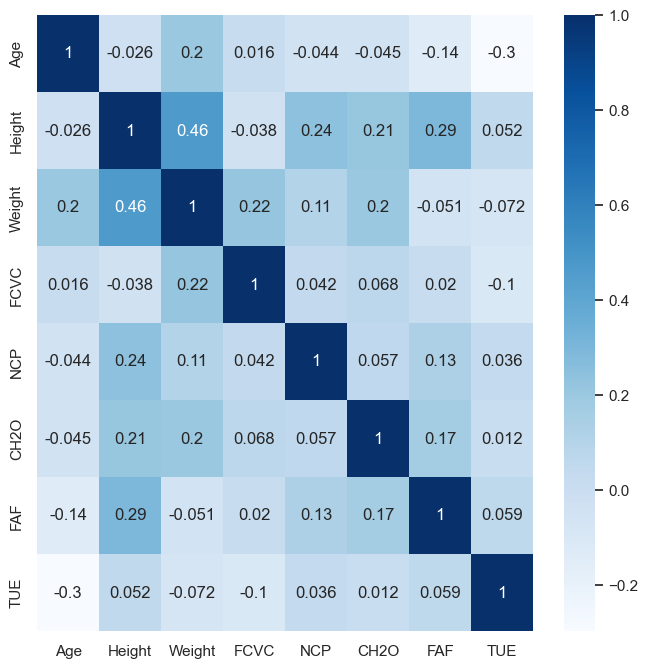

In [17]:
correlacoes = dados.corr(numeric_only=True)
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(correlacoes, annot=True, cmap='Blues')

### Começando Pré Processamento

Os dados nao possuem valores faltantes!

#### Removendo valores Duplicados

In [18]:
dados = dados.drop_duplicates()
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#### Removendo Outliers

Outlier Age

In [19]:
dados.describe()
primeiro_quartil = dados.quantile(q=0.25, axis=0, numeric_only=True)
terceiro_quartil = dados.quantile(q=0.75, axis=0, numeric_only=True)

print(primeiro_quartil[0])
print(terceiro_quartil[0])

menor = primeiro_quartil[0] - (terceiro_quartil[0] - primeiro_quartil[0])*3
maior = terceiro_quartil[0] + (terceiro_quartil[0] - primeiro_quartil[0])*3

19.9159375
26.0


C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\3338049579.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(primeiro_quartil[0])
C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\3338049579.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(terceiro_quartil[0])
C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\3338049579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  menor = primeiro_quartil[0] - (terceiro_qua

In [20]:
dados[dados['Age'] < menor]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [21]:
dados[dados['Age'] > maior]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
21,Female,52.000000,1.690000,87.000000,yes,yes,3.000000,1.000000,Sometimes,yes,2.000000,no,0.000000,0.0,no,Automobile,Obesity_Type_I
92,Male,55.000000,1.780000,84.000000,yes,no,3.000000,4.000000,Frequently,no,3.000000,yes,3.000000,0.0,Frequently,Walking,Overweight_Level_I
133,Female,61.000000,1.650000,66.000000,no,yes,3.000000,3.000000,Always,no,2.000000,no,1.000000,1.0,Frequently,Public_Transportation,Normal_Weight
161,Male,55.000000,1.650000,80.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.0,no,Automobile,Overweight_Level_II
169,Female,45.000000,1.630000,77.000000,yes,yes,2.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.0,no,Automobile,Overweight_Level_II
232,Female,51.000000,1.590000,50.000000,yes,no,3.000000,3.000000,Sometimes,yes,3.000000,yes,2.000000,0.0,no,Public_Transportation,Normal_Weight
252,Male,56.000000,1.790000,90.000000,yes,no,2.000000,3.000000,Sometimes,yes,2.000000,no,1.000000,0.0,Frequently,Automobile,Overweight_Level_II
492,Male,45.000000,1.700000,86.000000,no,yes,3.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.0,no,Automobile,Overweight_Level_II
1013,Male,55.246250,1.769269,80.491339,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.0,no,Automobile,Overweight_Level_II
1034,Male,50.832559,1.745528,82.130728,yes,yes,2.000000,3.000000,Sometimes,no,1.774778,no,0.943266,0.0,no,Automobile,Overweight_Level_II


In [22]:
dados = dados.drop(index=dados[dados['Age'] > maior].index)
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Outlier Height

In [23]:
print(primeiro_quartil[1])
print(terceiro_quartil[1])

menor = primeiro_quartil[1] - (terceiro_quartil[1] - primeiro_quartil[1])*3
maior = terceiro_quartil[1] + (terceiro_quartil[1] - primeiro_quartil[1])*3

1.6301785
1.7694915


C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\4290599729.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(primeiro_quartil[1])
C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\4290599729.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(terceiro_quartil[1])
C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\4290599729.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  menor = primeiro_quartil[1] - (terceiro_qua

In [24]:
dados[dados['Height'] < menor]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [25]:
dados[dados['Height'] > maior]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [26]:
dados = dados.drop(index=dados[dados['Height'] > maior].index)
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Outlier Weight

In [27]:
print(primeiro_quartil[2])
print(terceiro_quartil[2])

#enor = primeiro_quartil[2] - (terceiro_quartil[2] - primeiro_quartil[2])*3
maior = terceiro_quartil[2] + (terceiro_quartil[2] - primeiro_quartil[2])*3

66.0
108.015907


C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\2956779459.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(primeiro_quartil[2])
C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\2956779459.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(terceiro_quartil[2])
C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\2956779459.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maior = terceiro_quartil[2] + (terceiro_qua

In [28]:
dados[dados['Weight'] < menor]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [29]:
dados[dados['Weight'] > maior]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [30]:
dados = dados.drop(index=dados[dados['Weight'] > maior].index)

Outlier NCP

In [31]:
print(primeiro_quartil[4])
print(terceiro_quartil[4])

menor = primeiro_quartil[4] - (terceiro_quartil[4] - primeiro_quartil[4])*3
maior = terceiro_quartil[4] + (terceiro_quartil[4] - primeiro_quartil[4])*3

2.697467
3.0


C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\997807463.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(primeiro_quartil[4])
C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\997807463.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(terceiro_quartil[4])
C:\Users\gusta\AppData\Local\Temp\ipykernel_16588\997807463.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  menor = primeiro_quartil[4] - (terceiro_quarti

In [32]:
dados[dados['NCP'] < menor]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
4,Male,22.000000,1.780000,89.800000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
14,Male,23.000000,1.770000,60.000000,yes,yes,3.000000,1.000000,Sometimes,no,1.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
16,Male,27.000000,1.930000,102.000000,yes,yes,2.000000,1.000000,Sometimes,no,1.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
17,Female,29.000000,1.530000,78.000000,no,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,no,Automobile,Obesity_Type_I
19,Female,23.000000,1.650000,70.000000,yes,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,Male,24.002404,1.609418,100.078367,yes,yes,2.885693,1.685134,Sometimes,no,1.011849,no,0.503105,1.217929,no,Public_Transportation,Obesity_Type_II
1795,Male,20.068432,1.657132,105.580491,yes,yes,2.724121,1.437959,Sometimes,no,1.590418,no,0.029603,1.122118,no,Public_Transportation,Obesity_Type_II
1796,Male,20.914366,1.644751,101.067988,yes,yes,2.801992,1.343117,Sometimes,no,1.128942,no,0.233987,0.819980,no,Public_Transportation,Obesity_Type_II
1797,Male,25.512048,1.660761,104.321463,yes,yes,2.748971,1.213431,Sometimes,no,1.448875,no,0.128548,1.239038,no,Public_Transportation,Obesity_Type_II


In [33]:
dados[dados['NCP'] > maior]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
18,Female,30.000000,1.710000,82.000000,yes,yes,3.000000,4.000000,Frequently,yes,1.000000,no,0.000000,0.000000,no,Automobile,Overweight_Level_II
25,Male,20.000000,1.600000,50.000000,yes,no,2.000000,4.000000,Frequently,yes,2.000000,no,3.000000,2.000000,no,Public_Transportation,Normal_Weight
27,Female,23.000000,1.600000,52.000000,no,yes,2.000000,4.000000,Frequently,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Normal_Weight
30,Male,29.000000,1.770000,83.000000,no,yes,1.000000,4.000000,Frequently,no,3.000000,no,0.000000,1.000000,no,Motorbike,Overweight_Level_I
34,Male,22.000000,1.650000,62.000000,no,yes,2.000000,4.000000,Frequently,no,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Female,23.469538,1.507106,64.814109,yes,no,2.252472,3.986652,Sometimes,no,2.000000,no,0.934286,0.890626,no,Public_Transportation,Overweight_Level_II
1515,Male,37.186795,1.704877,107.947470,yes,yes,2.549782,3.985442,Sometimes,no,1.000000,no,1.976582,0.000000,no,Public_Transportation,Obesity_Type_II
1537,Male,30.870724,1.670774,101.626189,yes,yes,2.907744,3.990925,Sometimes,no,1.000000,no,1.999750,0.000000,no,Public_Transportation,Obesity_Type_II
1561,Male,31.194458,1.726279,110.714711,yes,yes,1.794825,3.914454,Sometimes,no,1.972016,no,0.668963,0.000000,no,Automobile,Obesity_Type_II


In [34]:
dados = dados.drop(index=dados[dados['NCP'] < menor].index)
dados = dados.drop(index=dados[dados['NCP'] > maior].index)
dados

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
5,Male,29.000000,1.620000,53.000000,no,yes,2.0,3.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#### Transformando variáveis qualitativas para quantitativas

formatando algumas colunas

In [35]:
dados["Gender"] = dados["Gender"].map({"Female":0,"Male":1})
dados["family_history_with_overweight"] = dados["family_history_with_overweight"].map({"no":0,"yes":1})
dados["FAVC"] = dados["FAVC"].map({"no":0,"yes":1})
dados["CAEC"] = dados["CAEC"].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})
dados["SMOKE"] = dados["SMOKE"].map({"no":0,"yes":1})
dados["SCC"] = dados["SCC"].map({"no":0,"yes":1})
dados["CALC"] = dados["CALC"].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})
dados["MTRANS"] = dados["MTRANS"].map({"Walking":0,"Public_Transportation":1,"Automobile":2,"Motorbike":3,"Bike":4 })
dados["NObeyesdad"] = dados["NObeyesdad"].map({"Insufficient_Weight":0,"Normal_Weight":1,"Overweight_Level_I":2,"Overweight_Level_II":3,"Obesity_Type_I":4,"Obesity_Type_II":5,"Obesity_Type_III":6})

In [36]:
X = dados.drop(columns=['NObeyesdad'])
y = dados['NObeyesdad']

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

y

0       1
1       1
2       1
3       2
4       1
       ..
1642    6
1643    6
1644    6
1645    6
1646    6
Name: NObeyesdad, Length: 1647, dtype: int64

### Aplique o Grid Search para encontrar os parâmetros ótimos do método LeaveOneOut + K-Vizinhos Mais Próximos. Faça, pelo menos, 30 execuções para calcular a média das métricas.

In [37]:
classifiers = [
	(
		"Nearest Neighbors", 'KNN', KNeighborsClassifier(),
		{'n_neighbors':[1,2,3,4,5,6,10], 'weights':['uniform', 'distance']}
  )
]

In [38]:
list_models=[]

#mínimo 30 iterações
for run in range(30):
    for name, clf_name, clf, clf_param_grid in classifiers:

      # n_folds=5
      #instancia método de validação cruzada
      # cv = model_selection.KFold(n_splits=n_folds, shuffle=True, random_state=run)
      cv = model_selection.LeaveOneOut()

      #instancia o Grid Search: classificador, grade de parâmetros, validacao cruzada, score
      clf_gcv=model_selection.GridSearchCV(estimator=clf, param_grid=clf_param_grid, cv=cv, scoring=make_scorer(accuracy_score), n_jobs=-1, verbose=0)

      #atribui o tempo quando inicia o processo de divisão em treinamento e teste
      st = time.time()

      #divide treinameto e teste
      for train, test in cv.split(X):
        
        X_train, X_test = X.values[train], X.values[test]
        y_train, y_test = y[train], y[test]

      #treina
      clf_gcv.fit(X_train, y_train)

      #imprime melhores parâmetros
      print(clf_gcv.best_params_)

      #realiza a predição
      y_pred = clf_gcv.predict(X_test)

      #calcula o tempo final
      st = time.time()-st

      #imprime metricas
      print(run, clf_name, f1_score(y_test, y_pred, average='weighted'), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), clf_gcv.best_params_)

    #armazena infromações em um dicionário
    l = {
      'DATASET'     : "ObesityDataSet_raw_and_data_sinthetic",
      'MODEL'       : clf_name,
      'RUN'         : run,
      'BEST_PARAMS'	: clf_gcv.best_params_,
      'TIME'        : st,
      'Y_TRUE'     	: y_test,
      'Y_PRED'     	: y_pred,
      'ACCURACY'    : accuracy_score(y_test, y_pred),
      'F1'     	    : f1_score(y_test, y_pred, average='weighted'),
      'RECALL'     	: recall_score(y_test, y_pred, average='weighted')
		}

    #adiciona a cada rodada em uma lista
    list_models.append(l)




{'n_neighbors': 1, 'weights': 'uniform'}
0 KNN 1.0 1.0 1.0 {'n_neighbors': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'weights': 'uniform'}
1 KNN 1.0 1.0 1.0 {'n_neighbors': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'weights': 'uniform'}
2 KNN 1.0 1.0 1.0 {'n_neighbors': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'weights': 'uniform'}
3 KNN 1.0 1.0 1.0 {'n_neighbors': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'weights': 'uniform'}
4 KNN 1.0 1.0 1.0 {'n_neighbors': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'weights': 'uniform'}
5 KNN 1.0 1.0 1.0 {'n_neighbors': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'weights': 'uniform'}
6 KNN 1.0 1.0 1.0 {'n_neighbors': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'weights': 'uniform'}
7 KNN 1.0 1.0 1.0 {'n_neighbors': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'weights': 'uniform'}
8 KNN 1.0 1.0 1.0 {'n_neighbors': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'weights': 'uniform'}
9 KNN 1.0 1.0 1.0 {'n_neighbors': 1, 'weights': 'uniform'}


In [39]:
aux = pd.DataFrame(list_models)
aux

,DATASET,MODEL,RUN,BEST_PARAMS,TIME,Y_TRUE,Y_PRED,ACCURACY,F1,RECALL
0,ObesityDataSet_raw_and_data_sinthetic,KNN,0,"{'n_neighbors': 1, 'weights': 'uniform'}",8.835009,"1646 6 Name: NObeyesdad, dtype: int64",[6],1.0,1.0,1.0
1,ObesityDataSet_raw_and_data_sinthetic,KNN,1,"{'n_neighbors': 1, 'weights': 'uniform'}",5.879616,"1646 6 Name: NObeyesdad, dtype: int64",[6],1.0,1.0,1.0
2,ObesityDataSet_raw_and_data_sinthetic,KNN,2,"{'n_neighbors': 1, 'weights': 'uniform'}",5.957504,"1646 6 Name: NObeyesdad, dtype: int64",[6],1.0,1.0,1.0
3,ObesityDataSet_raw_and_data_sinthetic,KNN,3,"{'n_neighbors': 1, 'weights': 'uniform'}",6.059345,"1646 6 Name: NObeyesdad, dtype: int64",[6],1.0,1.0,1.0
4,ObesityDataSet_raw_and_data_sinthetic,KNN,4,"{'n_neighbors': 1, 'weights': 'uniform'}",5.986378,"1646 6 Name: NObeyesdad, dtype: int64",[6],1.0,1.0,1.0
5,ObesityDataSet_raw_and_data_sinthetic,KNN,5,"{'n_neighbors': 1, 'weights': 'uniform'}",5.904870,"1646 6 Name: NObeyesdad, dtype: int64",[6],1.0,1.0,1.0
6,ObesityDataSet_raw_and_data_sinthetic,KNN,6,"{'n_neighbors': 1, 'weights': 'uniform'}",5.780943,"1646 6 Name: NObeyesdad, dtype: int64",[6],1.0,1.0,1.0
7,ObesityDataSet_raw_and_data_sinthetic,KNN,7,"{'n_neighbors': 1, 'weights': 'uniform'}",5.629782,"1646 6 Name: NObeyesdad, dtype: int64",[6],1.0,1.0,1.0
8,ObesityDataSet_raw_and_data_sinthetic,KNN,8,"{'n_neighbors': 1, 'weights': 'uniform'}",5.782460,"1646 6 Name: NObeyesdad, dtype: int64",[6],1.0,1.0,1.0
9,ObesityDataSet_raw_and_data_sinthetic,KNN,9,"{'n_neighbors': 1, 'weights': 'uniform'}",5.880279,"1646 6 Name: NObeyesdad, dtype: int64",[6],1.0,1.0,1.0
